# Crime in Cornwall

This is the exploratory notebook for the Cornwall Crime app.  The data was downloaded from the uk police dataset
- https://data.police.uk/data

The dataset used was from the records of devon & cornwall police on a monthly basis over 2018.  The final output is a dataset of coordinates that can be used with the Google map api to display the data:
- https://developers-dot-devsite-v2-prod.appspot.com/maps/documentation/javascript/examples/layer-heatmap


In [176]:
import numpy as np 
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import os
import glob

## Process the data

The downloaded data from Devon & Cornwall from Sep 2018 - Aug 2019 is contained contained in seperate csv file for each month.  Combine into one file for proecssing

In [177]:
#crime data from sep 2018 - aug 2019 in seperate files
dirpath = os.getcwd() + '\\police_records'
os.chdir(dirpath)
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
all_filenames

['2018-01-devon-and-cornwall-street.csv',
 '2018-02-devon-and-cornwall-street.csv',
 '2018-03-devon-and-cornwall-street.csv',
 '2018-04-devon-and-cornwall-street.csv',
 '2018-05-devon-and-cornwall-street.csv',
 '2018-06-devon-and-cornwall-street.csv',
 '2018-07-devon-and-cornwall-street.csv',
 '2018-08-devon-and-cornwall-street.csv',
 '2018-09-devon-and-cornwall-street.csv',
 '2018-10-devon-and-cornwall-street.csv',
 '2018-11-devon-and-cornwall-street.csv',
 '2018-12-devon-and-cornwall-street.csv',
 'combined_crime.csv']

In [178]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv only once
#combined_csv.to_csv( "combined_crime.csv", index=False, encoding='utf-8-sig')

In [179]:
#go back to working directory
dirpath = 'D:\\Programming\\monetizing_ml\\mine\\crime_app'
os.chdir(dirpath)

In [180]:
#make a copy
crime_df = combined_csv.copy()
crime_df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2018-01,Devon & Cornwall Police,Devon & Cornwall Police,-4.546017,50.827914,On or near Ergue-Gaberic Way,E01018936,Cornwall 001A,Anti-social behaviour,NaN,NaN
1,NaN,2018-01,Devon & Cornwall Police,Devon & Cornwall Police,-4.544041,50.830754,On or near Queen Street,E01018936,Cornwall 001A,Anti-social behaviour,NaN,NaN
2,NaN,2018-01,Devon & Cornwall Police,Devon & Cornwall Police,-4.544117,50.827973,On or near The Strand,E01018936,Cornwall 001A,Anti-social behaviour,NaN,NaN
3,NaN,2018-01,Devon & Cornwall Police,Devon & Cornwall Police,-4.545135,50.830505,On or near Belle Vue,E01018936,Cornwall 001A,Anti-social behaviour,NaN,NaN
4,NaN,2018-01,Devon & Cornwall Police,Devon & Cornwall Police,-4.544574,50.830635,On or near Belle Vue Lane,E01018936,Cornwall 001A,Anti-social behaviour,NaN,NaN


In [181]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291150 entries, 0 to 145574
Data columns (total 12 columns):
Crime ID                 211038 non-null object
Month                    291150 non-null object
Reported by              291150 non-null object
Falls within             291150 non-null object
Longitude                278514 non-null float64
Latitude                 278514 non-null float64
Location                 291150 non-null object
LSOA code                278514 non-null object
LSOA name                278514 non-null object
Crime type               291150 non-null object
Last outcome category    211038 non-null object
Context                  0 non-null float64
dtypes: float64(3), object(9)
memory usage: 28.9+ MB


## Clean the data
Remove useless columns and rename

In [182]:
crime_df = crime_df[['Month','Longitude','Latitude','Crime type']]
#crime_df.info()
crime_df.columns = ['Date','Longitude','Latitude','Crime_Type']
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291150 entries, 0 to 145574
Data columns (total 4 columns):
Date          291150 non-null object
Longitude     278514 non-null float64
Latitude      278514 non-null float64
Crime_Type    291150 non-null object
dtypes: float64(2), object(2)
memory usage: 11.1+ MB


In [183]:
crime_df[crime_df.Latitude.isnull()].head()

,Date,Longitude,Latitude,Crime_Type
10635,2018-01,NaN,NaN,Bicycle theft
10636,2018-01,NaN,NaN,Bicycle theft
10637,2018-01,NaN,NaN,Bicycle theft
10638,2018-01,NaN,NaN,Bicycle theft
10639,2018-01,NaN,NaN,Burglary


Where the location of the crime was reported as 'No location' there is no geo info recorded this is the reason for missing longitude and latitde data.  We will drop rows missing this data as geo info is required

In [184]:
#drop any row that has missing values
crime_df = crime_df.dropna()

In [185]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278514 entries, 0 to 145148
Data columns (total 4 columns):
Date          278514 non-null object
Longitude     278514 non-null float64
Latitude      278514 non-null float64
Crime_Type    278514 non-null object
dtypes: float64(2), object(2)
memory usage: 10.6+ MB


In [186]:
#turn month string into datetime object
#crime_df['Date'] = pd.to_datetime(crime_df.Date, format='%Y-%m-%d', errors='coerce')

#date_dic  = {'01':'January','02':'February','03':'March','04':'April','05':'May','06':'June','07':'July',
                #'08':'August','09':'September','10':'October','11':'November','12':'December'}
    
#for index, row in crime_df.iterrows():
#    month_year = date_dic[row['Date'].split('-')[1]] + '-' + '2018'
#    crime_df.loc[index,'month_year'] = month_year  
    
crime_df['month'] = [(dte.split("-")[1]) for dte in crime_df['Date']]    
crime_df['Month'] = crime_df['month'].replace({'01':'January','02':'February','03':'March','04':'April','05':'May',
                        '06':'June','07':'July','08':'August','09':'September','10':'October','11':'November','12':'December'})   


In [187]:
crime_df.drop(columns=['month'],inplace=True)
crime_df.columns

Index(['Date', 'Longitude', 'Latitude', 'Crime_Type', 'Month'], dtype='object')

## Creating new categories

In [188]:
crime_df.Crime_Type.value_counts()

Violence and sexual offences    85524
Anti-social behaviour           80112
Criminal damage and arson       26580
Other theft                     20298
Shoplifting                     14862
Public order                    13244
Burglary                        10654
Vehicle crime                   10048
Drugs                            7122
Other crime                      4150
Bicycle theft                    1670
Possession of weapons            1662
Theft from the person            1530
Robbery                          1058
Name: Crime_Type, dtype: int64

In [189]:
#group by types
Theft = ['Other theft','Shoplifting','Burglary','Bicycle theft','Robbery','Theft from the person']
Violence = ['Violence and sexual offences','Possession of weapons','Criminal damage and arson']
Anti_Social = ['Anti-social behaviour','Drugs']
Other = ['Public order','Vehicle crime','Other crime']

Crime_Types = Theft + Violence + Other + Anti_Social
crime_df = crime_df[crime_df['Crime_Type'].isin(Crime_Types)]

# create new super groups
selections = [
    (crime_df['Crime_Type'].isin(Theft)),
    (crime_df['Crime_Type'].isin(Violence)),
    (crime_df['Crime_Type'].isin(Other)),
    (crime_df['Crime_Type'].isin(Anti_Social))
]

new_categories = ['Theft', 'Violence', 'Other','Anti_Social']
crime_df['Category'] = np.select(selections, new_categories, default='Other')
crime_df['Category'].value_counts()
 

Violence       113766
Anti_Social     87234
Theft           50072
Other           27442
Name: Category, dtype: int64

## Exploring Month of Crimes

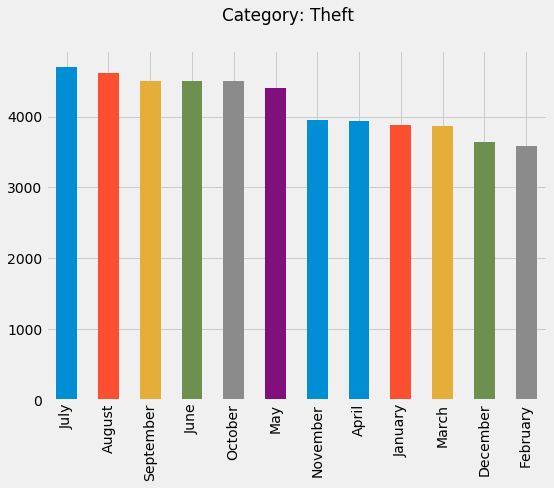

In [190]:
plt.rcParams['figure.figsize'] = [8, 6]

crime_df_tmp = crime_df[crime_df['Category'] == 'Theft']
crime_df_tmp['Month'].value_counts().plot(kind='bar')
plt.suptitle('Category: Theft')
plt.show()


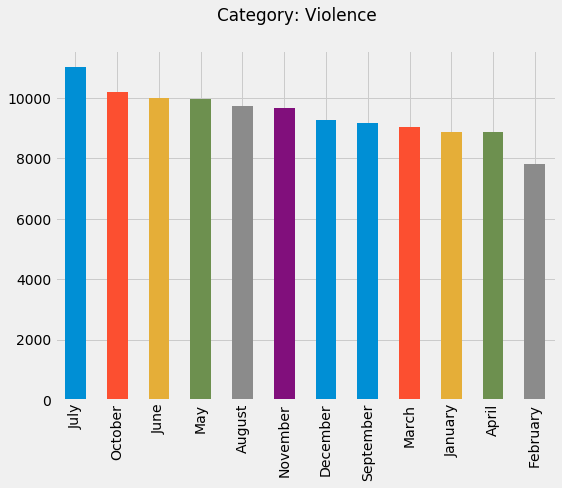

In [191]:
crime_df_tmp = crime_df[crime_df['Category'] == 'Violence']
crime_df_tmp['Month'].value_counts().plot(kind='bar')
plt.suptitle('Category: Violence')
plt.show()

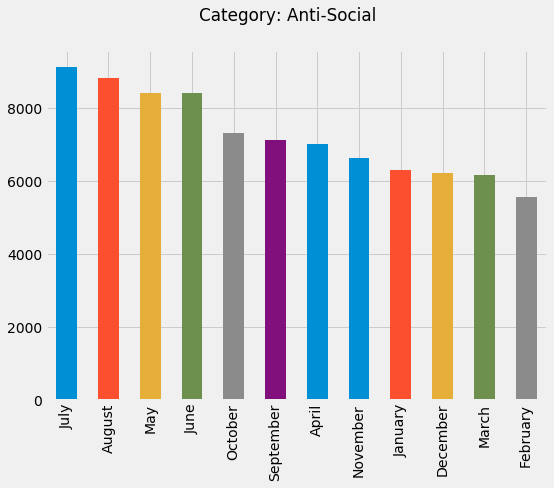

In [192]:
crime_df_tmp = crime_df[crime_df['Category'] == 'Anti_Social']
crime_df_tmp['Month'].value_counts().plot(kind='bar')
plt.suptitle('Category: Anti-Social')
plt.show()

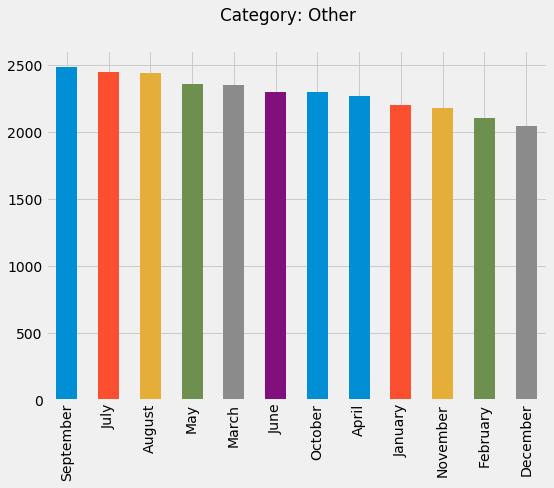

In [193]:
crime_df_tmp = crime_df[crime_df['Category'] == 'Other']
crime_df_tmp['Month'].value_counts().plot(kind='bar')
plt.suptitle('Category: Other')
plt.show()

In [194]:
crime_by_month = pd.DataFrame(crime_df["Month"].value_counts())
crime_by_month

,Month
July,27338
August,25640
June,25242
May,25164
October,24318
September,23318
November,22438
April,22098
March,21446
January,21270


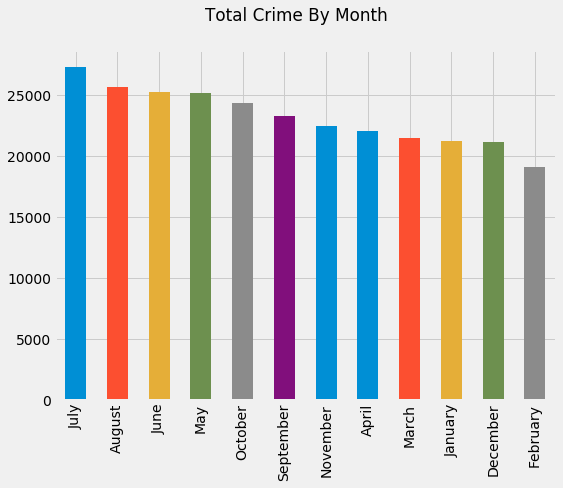

In [195]:
crime_by_month['Month'].plot(kind='bar')
plt.suptitle('Total Crime By Month')
plt.show()

## Geo coordinates

In [196]:
crime_df.Longitude.describe()

count    278514.000000
mean         -4.123420
std           0.635569
min          -6.345225
25%          -4.458482
50%          -4.121335
75%          -3.540263
max          -0.165967
Name: Longitude, dtype: float64

In [197]:
# plot geocords
# remove edge coordinates / outliers 
q = crime_df["Longitude"].quantile(0.95)
crime_df = crime_df[crime_df["Longitude"] < q]
q = crime_df["Latitude"].quantile(0.95)
crime_df = crime_df[crime_df["Latitude"] < q]
crime_df["Latitude"].describe()

count    251354.000000
mean         50.469195
std           0.202371
min          49.892920
25%          50.369959
50%          50.418250
75%          50.554186
max          51.065322
Name: Latitude, dtype: float64

In [198]:
#remove scilly isles
crime_df = crime_df[crime_df['Longitude'] > -6.0]

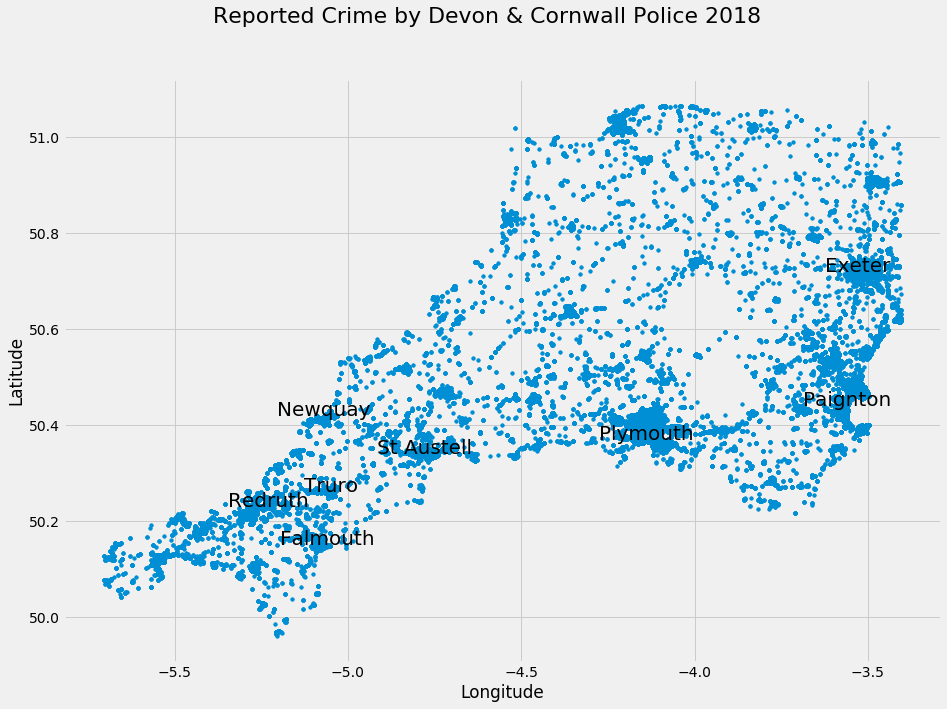

In [199]:
plt.rcParams['figure.figsize'] = [14, 10]
plt.plot(crime_df['Longitude'], crime_df['Latitude'],linestyle='none', marker='.')
plt.suptitle('Reported Crime by Devon & Cornwall Police 2018',size=22)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.annotate(xy=(-4.14, 50.37),s='Plymouth',ha='center', size=20)
plt.annotate(xy=(-5.06, 50.15),s='Falmouth',ha='center', size=20)
plt.annotate(xy=(-5.07, 50.42),s='Newquay',ha='center', size=20)
plt.annotate(xy=(-5.05, 50.26),s='Truro',ha='center', size=20)
plt.annotate(xy=(-5.23, 50.23), s='Redruth',ha='center', size=20)
plt.annotate(xy=(-4.78, 50.34), s='St Austell',ha='center', size=20)
plt.annotate(xy=(-3.53, 50.72), s='Exeter',ha='center', size=20)
plt.annotate(xy=(-3.56, 50.44), s='Paignton',ha='center', size=20)
plt.show()

In [200]:
#get most of cornwall
crime_df = crime_df[crime_df['Longitude'] < -4.5]

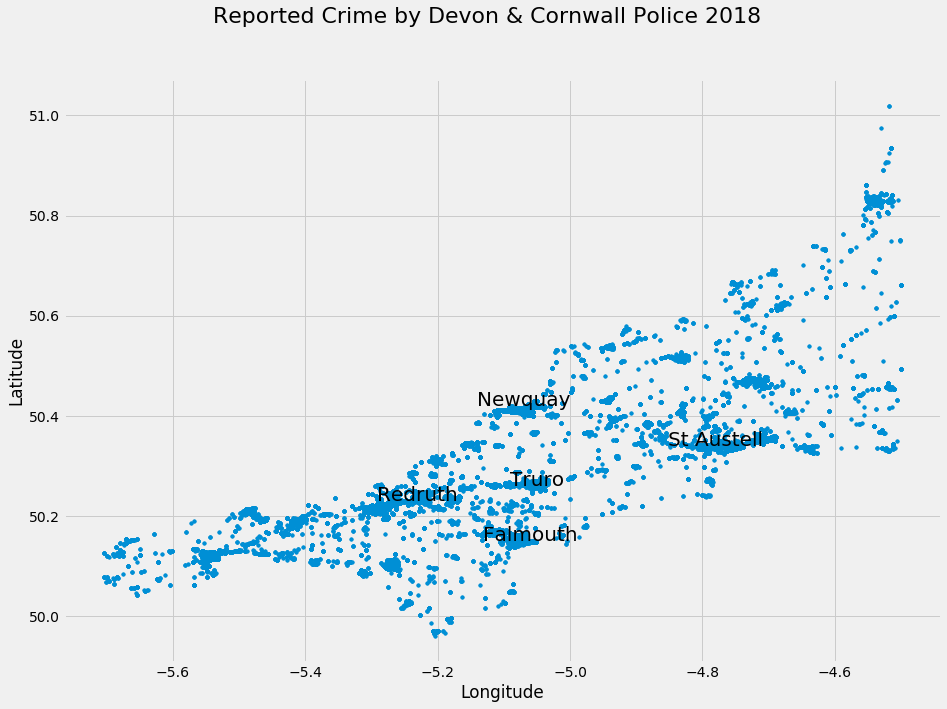

In [201]:
plt.rcParams['figure.figsize'] = [14, 10]
plt.plot(crime_df['Longitude'], crime_df['Latitude'],linestyle='none', marker='.')
plt.suptitle('Reported Crime by Devon & Cornwall Police 2018',size=22)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.annotate(xy=(-4.14, 50.37),s='Plymouth',ha='center', size=20)
plt.annotate(xy=(-5.06, 50.15),s='Falmouth',ha='center', size=20)
plt.annotate(xy=(-5.07, 50.42),s='Newquay',ha='center', size=20)
plt.annotate(xy=(-5.05, 50.26),s='Truro',ha='center', size=20)
plt.annotate(xy=(-5.23, 50.23), s='Redruth',ha='center', size=20)
plt.annotate(xy=(-4.78, 50.34), s='St Austell',ha='center', size=20)
#plt.annotate(xy=(-3.53, 50.72), s='Exeter',ha='center', size=20)
#plt.annotate(xy=(-3.56, 50.44), s='Paignton',ha='center', size=20)
plt.show()

## Final Features

Aggregating and selecting final features

In [202]:
crime_df.head()

,Date,Longitude,Latitude,Crime_Type,Month,Category
0,2018-01,-4.546017,50.827914,Anti-social behaviour,January,Anti_Social
1,2018-01,-4.544041,50.830754,Anti-social behaviour,January,Anti_Social
2,2018-01,-4.544117,50.827973,Anti-social behaviour,January,Anti_Social
3,2018-01,-4.545135,50.830505,Anti-social behaviour,January,Anti_Social
4,2018-01,-4.544574,50.830635,Anti-social behaviour,January,Anti_Social


In [203]:
#put into integer numeric format and remove leading 0
crime_df['Month'] = [int((dte.split("-")[1]).strip('0')) for dte in crime_df['Date']]  

In [204]:
crime_df.drop(['Crime_Type','Date'],axis=1,inplace=True)
crime_df.tail()

,Longitude,Latitude,Month,Category
137424,-5.135728,50.063540,12,Violence
137425,-5.087388,50.050471,12,Theft
137426,-5.091113,50.049958,12,Violence
144873,-4.514243,50.935787,12,Violence
144876,-4.514243,50.935787,12,Violence


In [205]:
#app has problems with displaying many point sub-sample and see difference
crime_df = crime_df.sample(frac=0.5)
crime_df.tail()

,Longitude,Latitude,Month,Category
99672,-5.239393,50.285125,9,Anti_Social
13036,-5.292044,50.215562,2,Anti_Social
697,-5.085059,50.412928,1,Theft
58086,-5.090419,50.413532,6,Violence
2463,-5.226978,50.240887,7,Violence


In [206]:
crime_df['Count'] = 0

crime_df_agg = crime_df.groupby(['Category', 'Month', 'Longitude', 'Latitude',]).count().reset_index()

# we will use this csv file in our web application 
crime_df_agg.to_csv('devon_cornwall_crime_horizon.csv', index=None)

In [207]:
crime_df_agg.head(10)

,Category,Month,Longitude,Latitude,Count
0,Anti_Social,1,-5.686905,50.122500,1
1,Anti_Social,1,-5.682681,50.123993,2
2,Anti_Social,1,-5.682112,50.125513,4
3,Anti_Social,1,-5.671393,50.145799,2
4,Anti_Social,1,-5.668009,50.101417,1
5,Anti_Social,1,-5.661756,50.151592,1
6,Anti_Social,1,-5.659701,50.153096,2
7,Anti_Social,1,-5.659701,50.153096,1
8,Anti_Social,1,-5.654310,50.107958,1
9,Anti_Social,1,-5.650519,50.121555,1


## Reconstruct from date signature
we only have data for each month of the year, use a slider on the app.  User selects the month and the app outputs the coords for display on the google map  

In [208]:
month = 6
crime_df_agg_tmp = crime_df_agg[(crime_df_agg['Month'] == month)]
crime_df_agg_tmp.head()

,Category,Month,Longitude,Latitude,Count
3331,Anti_Social,6,-5.684009,50.123060,1
3332,Anti_Social,6,-5.681455,50.123150,1
3333,Anti_Social,6,-5.623461,50.073659,1
3334,Anti_Social,6,-5.620152,50.076497,1
3335,Anti_Social,6,-5.569092,50.107634,1


In [209]:
import datetime
monthinteger = month
Month_Name = datetime.date(1900, monthinteger, 1).strftime('%B')
    
Month_Name
# translate time signature into readable format
title = "Crime Estimates For %s " % (Month_Name)

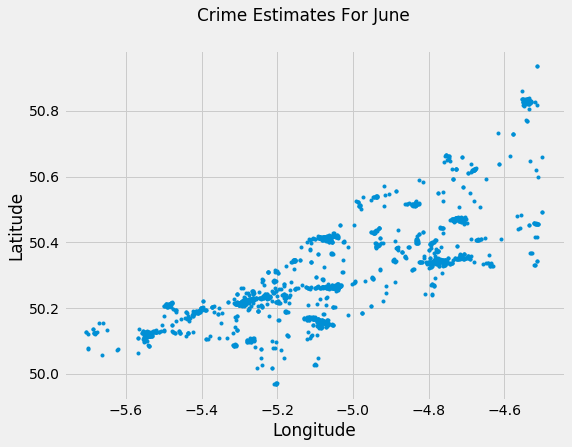

In [210]:
plt.rcParams['figure.figsize'] = [8, 6]

plt.plot(crime_df_agg_tmp['Longitude'] , crime_df_agg_tmp['Latitude'] ,
         linestyle='none', marker='.')
plt.suptitle(title)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

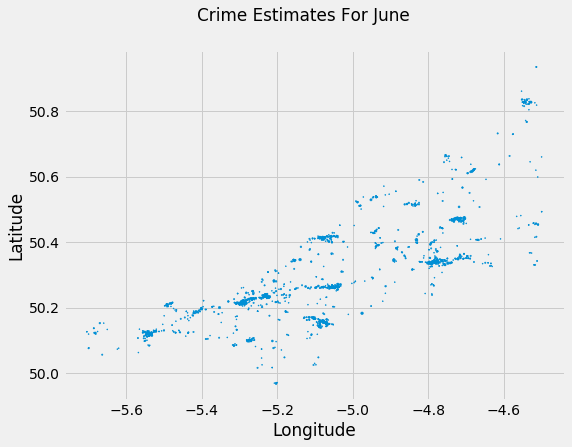

In [211]:
# Using plot.scatter to benefit from size of dot
plt.scatter(crime_df_agg_tmp['Longitude'] , 
         crime_df_agg_tmp['Latitude'] , s=crime_df_agg_tmp['Count'])
plt.suptitle(title)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Creating crime points for Google Maps

In [212]:
crime_df_agg_tmp['Longitude'].head()

3331   -5.684009
3332   -5.681455
3333   -5.623461
3334   -5.620152
3335   -5.569092
Name: Longitude, dtype: float64

In [213]:
# create new Google maps LatLng string
# Google LatLng format: new google.maps.LatLng(37.770467, -122.409801), new google.maps.LatLng(37.770090, -122.408904),
LatLngString = ''
for index, row in crime_df_agg_tmp.iterrows():
    LatLngString += "new google.maps.LatLng(" + str(row['Latitude']) + "," + str(row['Longitude']) + "),"

## Abstracting Code Into A Function For Our Web Application

In [214]:
crime_horizon_df = pd.read_csv('devon_cornwall_crime_horizon.csv')
 

def GetCrime(horizon_date):
    #Day_of_month = int(horizon_date.split('/')[1])
    #print('Day_of_month:',Day_of_month)
    Month_of_year = horizon_date
    print('Month_of_year:',Month_of_year)
    #Day_Segment = int(horizon_time_segment) # 0,1,2
    #print('Day_Segment:',Day_Segment)
    crime_horizon_df_tmp = crime_horizon_df[
                                   (crime_horizon_df['Month'] == Month_of_year) ]
    
    LatLngString = ''
    # build latlng string for google maps
    for index, row in crime_horizon_df_tmp.iterrows():
        LatLngString += "new google.maps.LatLng(" + str(row['Latitude']) + "," + str(row['Longitude']) + "),"
     
    return (LatLngString)
    
#January
preds_crime_horizon = GetCrime(1)

Month_of_year: 1


In [215]:
preds_crime_horizon[0:200]

'new google.maps.LatLng(50.1225,-5.686905),new google.maps.LatLng(50.123993,-5.682681),new google.maps.LatLng(50.125513,-5.682112),new google.maps.LatLng(50.145799,-5.671393),new google.maps.LatLng(50.'

In [216]:
crime_horizon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21856 entries, 0 to 21855
Data columns (total 5 columns):
Category     21856 non-null object
Month        21856 non-null int64
Longitude    21856 non-null float64
Latitude     21856 non-null float64
Count        21856 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 853.8+ KB
